In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import matplotlib.pyplot as plt

In [12]:
# Load data
data = pd.read_csv(r"D:\city_hour.csv")
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [13]:
data.isnull()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
1,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
2,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
3,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True,True
4,False,False,True,True,False,False,False,True,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False
707871,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
707872,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
707873,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False


In [14]:
data = data.dropna()
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50888,Amaravati,2017-11-25 09:00:00,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
50889,Amaravati,2017-11-25 10:00:00,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
50890,Amaravati,2017-11-25 11:00:00,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
50893,Amaravati,2017-11-25 14:00:00,68.50,117.00,1.35,13.60,8.35,7.40,0.10,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
50894,Amaravati,2017-11-25 15:00:00,69.25,112.25,1.52,11.80,7.55,9.25,0.10,21.38,161.68,0.10,2.35,0.00,191.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707863,Visakhapatnam,2020-06-30 13:00:00,12.75,45.00,0.55,17.20,9.32,9.12,0.11,10.82,45.80,0.00,0.00,0.00,50.0,Good
707864,Visakhapatnam,2020-06-30 14:00:00,10.75,36.75,1.10,17.75,10.28,4.65,0.34,4.38,50.73,0.00,0.00,0.00,51.0,Satisfactory
707865,Visakhapatnam,2020-06-30 15:00:00,15.75,30.25,0.95,13.75,8.07,4.67,0.30,2.90,41.55,0.00,0.00,0.00,51.0,Satisfactory
707866,Visakhapatnam,2020-06-30 16:00:00,14.00,29.50,1.77,20.70,12.45,8.08,0.45,7.12,39.23,0.00,0.00,0.00,51.0,Satisfactory


In [15]:
# Select features and target variable
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'O3', 'NH3']
target = 'AQI'

# Preprocess data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data[target], test_size=0.2, random_state=42)

# Define LSTM model
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
  tf.keras.layers.LSTM(units=32, return_sequences=False),
  tf.keras.layers.Dense(units=1)
])

# Compile model
model.compile(loss='mse', optimizer='adam')

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
3232/3232 [==============================] - 18s 5ms/step - loss: 18088.4375
Epoch 2/10
3232/3232 [==============================] - 15s 5ms/step - loss: 9996.9424
Epoch 3/10
3232/3232 [==============================] - 15s 5ms/step - loss: 5726.1802
Epoch 4/10
3232/3232 [==============================] - 15s 5ms/step - loss: 3206.8232
Epoch 5/10
3232/3232 [==============================] - 15s 5ms/step - loss: 2401.5857
Epoch 6/10
3232/3232 [==============================] - 15s 5ms/step - loss: 2111.1292
Epoch 7/10
3232/3232 [==============================] - 15s 5ms/step - loss: 2007.4696
Epoch 8/10
3232/3232 [==============================] - 15s 5ms/step - loss: 1943.9030
Epoch 9/10
3232/3232 [==============================] - 15s 5ms/step - loss: 1907.2703
Epoch 10/10
3232/3232 [==============================] - 15s 5ms/step - loss: 1885.6183


In [27]:
# Evaluate model
predictions = model.predict(X_test)
predictions_flattened = predictions.ravel()
y_test_flattened = y_test.ravel()

mse = mean_squared_error(predictions_flattened, y_test_flattened)
mae = np.mean(np.abs(predictions_flattened - y_test_flattened))
r2 = r2_score(predictions_flattened, y_test_flattened)

print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

808/808 [==============================] - 2s 2ms/step
MSE: 1883.1450543266205
MAE: 28.592698790206768
R-squared: 0.7434437767153246


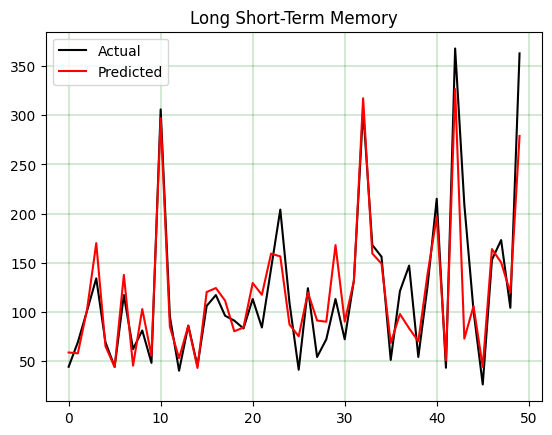

<Figure size 1200x800 with 0 Axes>

In [31]:
y_test_array = y_test[:50]
y_pred_LSTM = predictions[:50]
df1 = pd.DataFrame({'Actual': y_test_array.ravel(), 'Predicted': y_pred_LSTM.ravel()})
df1.plot(kind='line', color=['black', 'Red'])
plt.title("Long Short-Term Memory")
plt.grid(which='major', linestyle='-', linewidth='0.25', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')
plt.figure(figsize=(12, 8))
plt.show()

In [29]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test_array
result["PREDICTED AQI"] = y_pred_LSTM
result["DIFFERENCE"] = result["PREDICTED AQI"] - result["ACTUAL AQI"]
result["PERCENTAGE ERROR"] = ( abs(result["PREDICTED AQI"] - result["ACTUAL AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(10)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,PERCENTAGE ERROR
185024,44.0,58.537338,14.537338,33.039405
688199,69.0,57.683437,-11.316563,16.400815
701188,101.0,102.209457,1.209457,1.197483
291304,134.0,169.858612,35.858612,26.760158
68812,69.0,65.043182,-3.956818,5.734518
62189,44.0,43.736893,-0.263107,0.597971
702809,117.0,137.553360,20.553360,17.566974
474012,62.0,45.152351,-16.847649,27.173627
379627,81.0,102.792603,21.792603,26.904448
466659,48.0,55.289070,7.289070,15.185563
